In [53]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pprint import pprint

In [54]:
# base url
url = "https://data.ca.gov/api/3/action/datastore_search?resource_id=d73ee828-c2c6-485c-91dc-c26bd9ce3991" 

# Build partial query URL
query_url = f"{url}&limit=1000"
response = requests.get(query_url).json()
records = response['result']['records']

# put records in dataframe
records_df = pd.DataFrame(records)
records_df.head()

,_id,OBJECTID,Year,State,Agency,Unit ID,Fire Name,Local Incident Number,Alarm Date,Containment Date,...,Collection Method,Management Objective,GIS Calculated Acres,Comments,Complex Name,IRWIN ID,Fire Number (historical use),Complex ID,Shape__Area,Shape__Length
0,1,1,2023,CA,CDF,SKU,WHITWORTH,00004808,6/17/2023 12:00:00 AM,6/17/2023 12:00:00 AM,...,1,1,5.729125,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,41407.83984375,1247.16603398886
1,2,2,2023,CA,LRA,BTU,KAISER,00010225,6/2/2023 12:00:00 AM,6/2/2023 12:00:00 AM,...,1,1,13.60238,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,93455.87890625,1285.51454971661
2,3,3,2023,CA,CDF,AEU,JACKSON,00017640,7/1/2023 12:00:00 AM,7/2/2023 12:00:00 AM,...,1,1,27.81446,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,183028.5,2697.58742917456
3,4,4,2023,CA,CDF,AEU,CARBON,00018821,7/11/2023 12:00:00 AM,7/11/2023 12:00:00 AM,...,1,1,58.76023,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},None,None,388221.953125,2548.73877855158
4,5,5,2023,CA,CDF,AEU,LIBERTY,00018876,7/11/2023 12:00:00 AM,7/12/2023 12:00:00 AM,...,1,1,70.979,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},None,None,466456.0078125,5106.93652582734


In [55]:
# drop columns
records_df = records_df.drop(columns=['_id', 'OBJECTID', 'Comments', 'Complex Name', 'IRWIN ID',
                                      'Fire Number (historical use)', 'Complex ID', 'Local Incident Number',
                                      'Agency', 'Unit ID', 'State'])

# rename columns
renamed_df = records_df.rename(columns={'GIS Calculated Acres': 'Acres', 'Shape__Area': 'Area', 'Shape__Length':'Perimeter'})
renamed_df


,Year,Fire Name,Alarm Date,Containment Date,Cause,Collection Method,Management Objective,Acres,Area,Perimeter
0,2023,WHITWORTH,6/17/2023 12:00:00 AM,6/17/2023 12:00:00 AM,5,1,1,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,6/2/2023 12:00:00 AM,6/2/2023 12:00:00 AM,5,1,1,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,7/1/2023 12:00:00 AM,7/2/2023 12:00:00 AM,2,1,1,27.81446,183028.5,2697.58742917456
3,2023,CARBON,7/11/2023 12:00:00 AM,7/11/2023 12:00:00 AM,9,1,1,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,7/11/2023 12:00:00 AM,7/12/2023 12:00:00 AM,14,1,1,70.979,466456.0078125,5106.93652582734
...,...,...,...,...,...,...,...,...,...,...
995,2020,5-4 POTTERS,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,1,1,1,925.4019,6307904.03515625,16613.4839078942
996,2020,5-6 CASCADE CREEK,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,1,1,1,260.1756,1780346.8984375,7022.5749273688
997,2020,TEDDY,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,14,1,1,13.27956,90049.49609375,1648.63306678697
998,2020,COAST,6/29/2020 12:00:00 AM,6/29/2020 12:00:00 AM,7,7,1,20.2083,128343.16015625,1702.00092173474


In [56]:
# Convert 'Alarm Date' and 'Containment Date' columns to datetime format
renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])

# Extract date part only
renamed_df['Alarm Date'] = renamed_df['Alarm Date'].dt.date
renamed_df['Containment Date'] = renamed_df['Containment Date'].dt.date

# Convert 'Alarm Date' and 'Containment Date' columns back to datetime format
renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])

# Calculate duration in days and add as a new column
renamed_df['Fire Duration (Days)'] = (renamed_df['Containment Date'] - renamed_df['Alarm Date']).dt.days

new_order = ['Year', 'Fire Name', 'Alarm Date', 'Containment Date', 'Fire Duration (Days)', 'Cause',
             'Collection Method', 'Management Objective', 'Acres', 'Area',
             'Perimeter']

df_reordered = renamed_df[new_order]
df_reordered

C:\Users\jenni\AppData\Local\Temp\ipykernel_792\2752239839.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
C:\Users\jenni\AppData\Local\Temp\ipykernel_792\2752239839.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])


,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Collection Method,Management Objective,Acres,Area,Perimeter
0,2023,WHITWORTH,2023-06-17,2023-06-17,0.0,5,1,1,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,2023-06-02,2023-06-02,0.0,5,1,1,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,2023-07-01,2023-07-02,1.0,2,1,1,27.81446,183028.5,2697.58742917456
3,2023,CARBON,2023-07-11,2023-07-11,0.0,9,1,1,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,2023-07-11,2023-07-12,1.0,14,1,1,70.979,466456.0078125,5106.93652582734
...,...,...,...,...,...,...,...,...,...,...,...
995,2020,5-4 POTTERS,2020-08-17,2020-09-10,24.0,1,1,1,925.4019,6307904.03515625,16613.4839078942
996,2020,5-6 CASCADE CREEK,2020-08-17,2020-09-10,24.0,1,1,1,260.1756,1780346.8984375,7022.5749273688
997,2020,TEDDY,2020-06-18,2020-06-23,5.0,14,1,1,13.27956,90049.49609375,1648.63306678697
998,2020,COAST,2020-06-29,2020-06-29,0.0,7,7,1,20.2083,128343.16015625,1702.00092173474


In [57]:
# fire causes mapping dictionary
cause_mapping = {
    '1': 'Lightning',
    '2': 'Equipment Use',
    '3': 'Smoking',
    '4': 'Campfire',
    '5': 'Debris',
    '6': 'Railroad',
    '7': 'Arson',
    '8': 'Playing with fire',
    '9': 'Miscellaneous',
    '10': 'Vehicle',
    '11': 'Powerline',
    '12': 'Firefighter Training',
    '13': 'Non-Firefighter Training',
    '14': 'Unknown / Unidentified',
    '15': 'Structure',
    '16': 'Aircraft',
    '17': '',
    '18': 'Escaped Prescribed Burn',
    '19': 'Illegal Alien Campfire'
}

# replace cause values with causes
df_reordered['Cause'] = df_reordered['Cause'].replace(cause_mapping)

df_reordered.head()

,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Collection Method,Management Objective,Acres,Area,Perimeter
0,2023,WHITWORTH,2023-06-17,2023-06-17,0.0,Debris,1,1,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,2023-06-02,2023-06-02,0.0,Debris,1,1,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,2023-07-01,2023-07-02,1.0,Equipment Use,1,1,27.81446,183028.5,2697.58742917456
3,2023,CARBON,2023-07-11,2023-07-11,0.0,Miscellaneous,1,1,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,2023-07-11,2023-07-12,1.0,Unknown / Unidentified,1,1,70.979,466456.0078125,5106.93652582734


In [58]:
# create dataframes based on year of alarm dates
df_reordered['Alarm Date'] = pd.to_datetime(df_reordered['Alarm Date'])

df_2020 = df_reordered[df_reordered['Alarm Date'].dt.year == 2020]
df_2021 = df_reordered[df_reordered['Alarm Date'].dt.year == 2021]
df_2022 = df_reordered[df_reordered['Alarm Date'].dt.year == 2022]
df_2023 = df_reordered[df_reordered['Alarm Date'].dt.year == 2023]
#df_2024 = df_reordered[df_reordered['Alarm Date'].dt.year == 2024]

In [59]:
# list of dataframes
df_list = [df_2020, df_2021, df_2022, df_2023]

In [60]:
# sort the dataframes by alarm date
df_2020_sorted = df_2020.sort_values(by='Alarm Date')
df_2021_sorted = df_2021.sort_values(by='Alarm Date')
df_2022_sorted = df_2022.sort_values(by='Alarm Date')
df_2023_sorted = df_2023.sort_values(by='Alarm Date')

#reset indexes
df_2020_sorted = df_2020_sorted.reset_index(drop=True)
df_2021_sorted = df_2021_sorted.reset_index(drop=True)
df_2022_sorted = df_2022_sorted.reset_index(drop=True)
df_2023_sorted = df_2023_sorted.reset_index(drop=True)


In [61]:
df_2020_sorted.head()

,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Collection Method,Management Objective,Acres,Area,Perimeter
0,2020,WILLOW,2020-03-10,2020-03-11,1.0,Debris,1,1,33.97389,230549.78125,2477.15181547552
1,2020,FLEMING,2020-03-31,2020-04-01,1.0,Miscellaneous,1,1,12.93155,86679.4453125,2029.52488137503
2,2020,MELANESE,2020-04-14,2020-04-19,5.0,Escaped Prescribed Burn,1,1,10.31596,70179.1328125,1342.74290294001
3,2020,AMORUSO,2020-06-01,2020-06-04,3.0,Equipment Use,1,1,685.585,4578171.9140625,12399.3753905116
4,2020,RIOSA,2020-06-15,2020-06-15,0.0,Powerline,1,1,13.69472,91856.8515625,1743.67087360593


In [62]:
df_2021_sorted.head()

,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Collection Method,Management Objective,Acres,Area,Perimeter
0,2021,MIGUEL 3,2021-01-07,2021-01-07,0.0,Unknown / Unidentified,4,1,21.31999,122097.42578125,1645.44525529025
1,2021,NEWTON,2021-01-08,2021-01-08,0.0,Unknown / Unidentified,1,1,2.265879,13399.23828125,443.870646367217
2,2021,NEWTON,2021-01-08,2021-01-08,0.0,Unknown / Unidentified,1,1,1.865689,11034.1484375,782.094252013949
3,2021,BORDER,2021-01-10,2021-01-21,11.0,Miscellaneous,7,1,1.850452,10579.1171875,504.822650768738
4,2021,BORDER 2,2021-01-13,2021-01-21,8.0,Debris,7,1,18.64428,106607.16796875,1924.43632122754


In [63]:
# return first and last dates alarm dates

first_alarm_date = df_2021_sorted['Alarm Date'].iloc[0]
last_alarm_date = df_2021_sorted['Alarm Date'].iloc[-1]

print(f"the first alarm date of 2021 is {first_alarm_date} and the last alarm date is {last_alarm_date}")

the first alarm date of 2021 is 2021-01-07 00:00:00 and the last alarm date is 2021-12-11 00:00:00


In [64]:
# group 2021 fire data by causes 
grouped_by_cause_21 = df_2021_sorted.groupby('Cause').size()

# sort
grouped_by_cause_21 = grouped_by_cause_21.sort_values(ascending=True)

In [65]:
grouped_by_cause_21

Cause
Railroad                     1
Structure                    1
Playing with fire            2
Smoking                      2
Campfire                     7
Escaped Prescribed Burn      8
Powerline                   16
Arson                       20
Debris                      29
Vehicle                     32
Miscellaneous               45
Equipment Use               47
Lightning                   49
Unknown / Unidentified     129
dtype: int64

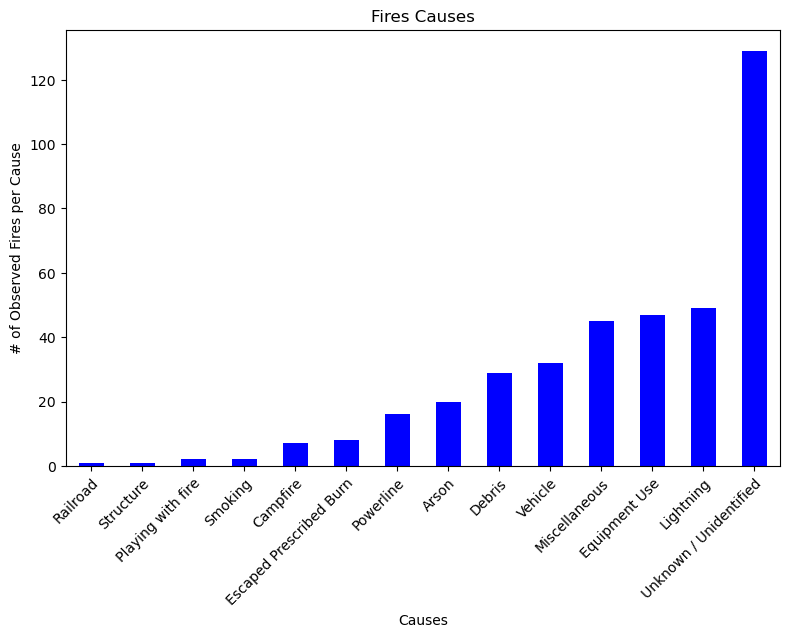

In [66]:
# bar plot shows cause counts
figure1 = grouped_by_cause_21.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Fires Causes",
                                xlabel="Causes",
                                ylabel="# of Observed Fires per Cause")

# x-tick rotation
xticklabels = grouped_by_cause_21.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Resize plot to display labels
plt.tight_layout()
plt.show()

In [67]:
# group 2023 fire data by causes 
grouped_by_cause_23 = df_2023_sorted.groupby('Cause').size()

# sort
grouped_by_cause_23 = grouped_by_cause_23.sort_values(ascending=True)
grouped_by_cause_23

Cause
Railroad                    1
Smoking                     2
Structure                   2
Campfire                    6
Debris                      7
Arson                       9
Powerline                  10
Miscellaneous              12
Vehicle                    23
Equipment Use              24
Lightning                  33
Unknown / Unidentified    155
dtype: int64

In [68]:
#output csv
df_2021.to_csv("output/fires_2021.csv", encoding="utf-8", index=False, header=True)

In [69]:
# 2021
# what is the collection method and its relationship with the other variables? 

# how would we calculate the density of fires? 

# compare acreage by what? causes? bin by month?  further categorize fire causes into natural and manmade 

# are there other vars that correlate with the causes, the unidentified ones in particular? can map unidentified ones? run stats on causes

# scatter plot dates, ave fire duration per cause, ave acreage per cause, methods

#create functions for repetitive code? 